# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Info

This notebook is for analysis of clients filtered by top 5 mcc codes (except 6010 and 6011) with the highest amount of transactions.

There are their ids:

id: 70780820, transactions: 88781 

id: 45479973, transactions: 34229

id: 90796706, transactions: 26856

id: 6736634, transactions: 25944

id: 60151282, transactions: 21111

# Data load

In [2]:
def primaryClientAnalysis(client):
    client = client.drop(client.axes[1][0], 1)
    client.head()
    client_mcc = {}
    mcc_codes = np.unique(client['mcc_code'])
    for code in mcc_codes:
        client_mcc[code] = client[client['mcc_code'] == code]
    legend = []
    for code in mcc_codes:
        if(len(client_mcc[code]) > 100):
            print("For this client and this mcc_code %s the summary is %s, amount of transactions is %s" % (code, sum(client_mcc[code]['amount']), len(client_mcc[code])))
            client_mcc[code]['amount'].plot(figsize=(15,10), legend=True)
            legend.append(code)
    plt.legend(legend)
    plt.show()
    return client_mcc

## Client 5546147

For this client and this mcc_code 4829 the summary is -550154083.91, amount of transactions is 4254


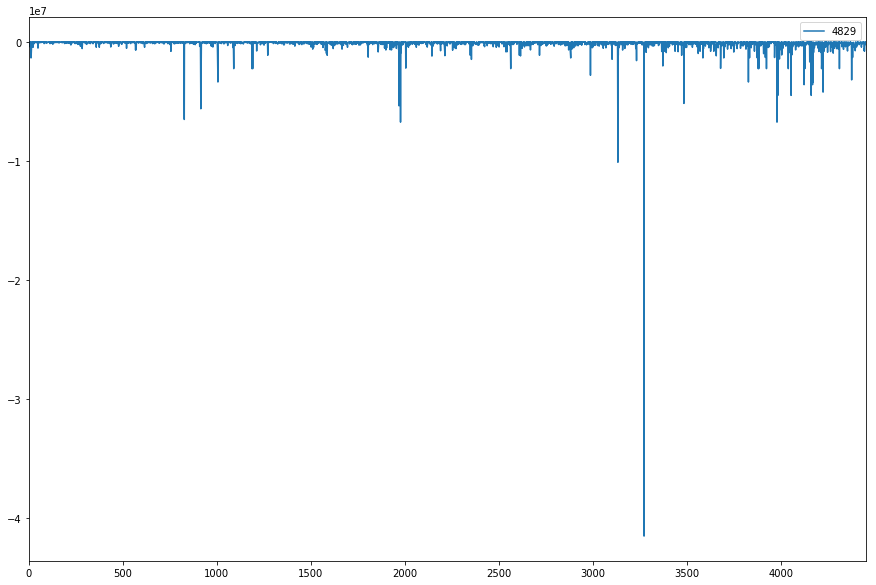

In [4]:
c1 = primaryClientAnalysis(pd.read_csv('5546147.csv'))

## Client 7999570

For this client and this mcc_code 4814 the summary is -5790622.87, amount of transactions is 465
For this client and this mcc_code 4829 the summary is -1706813213.4, amount of transactions is 14231
For this client and this mcc_code 5411 the summary is -3560610.23, amount of transactions is 120


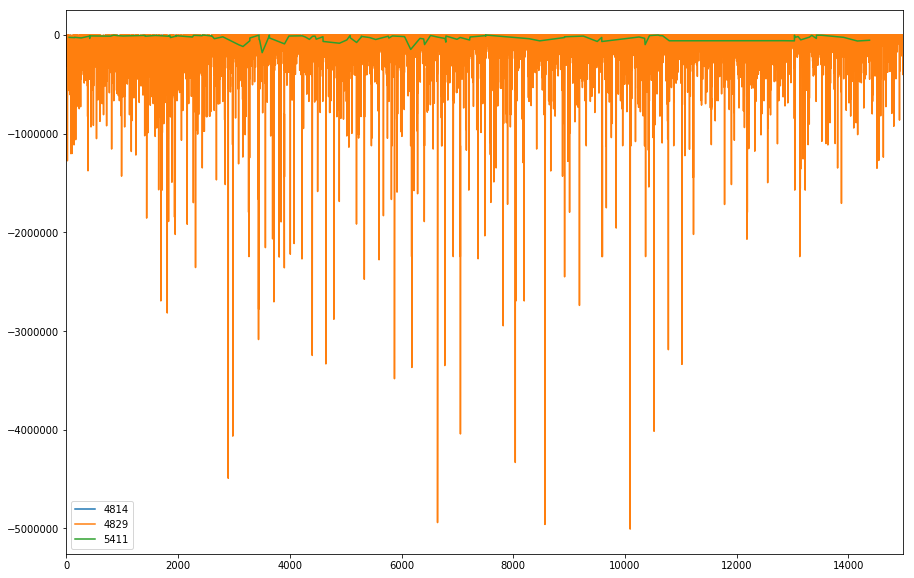

In [5]:
c2 = primaryClientAnalysis(pd.read_csv('7999570.csv'))

## Client 46890366

For this client and this mcc_code 4814 the summary is -21750144.01, amount of transactions is 8617


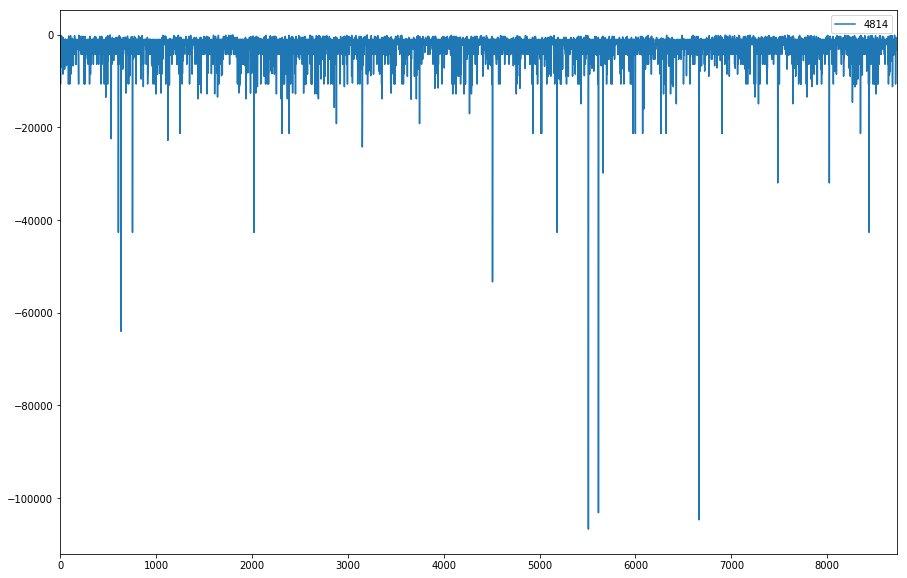

In [6]:
c3 = primaryClientAnalysis(pd.read_csv('46890366.csv'))

## Client 70665012

For this client and this mcc_code 4814 the summary is -4557345.58, amount of transactions is 490
For this client and this mcc_code 4829 the summary is -101272287.44, amount of transactions is 3320


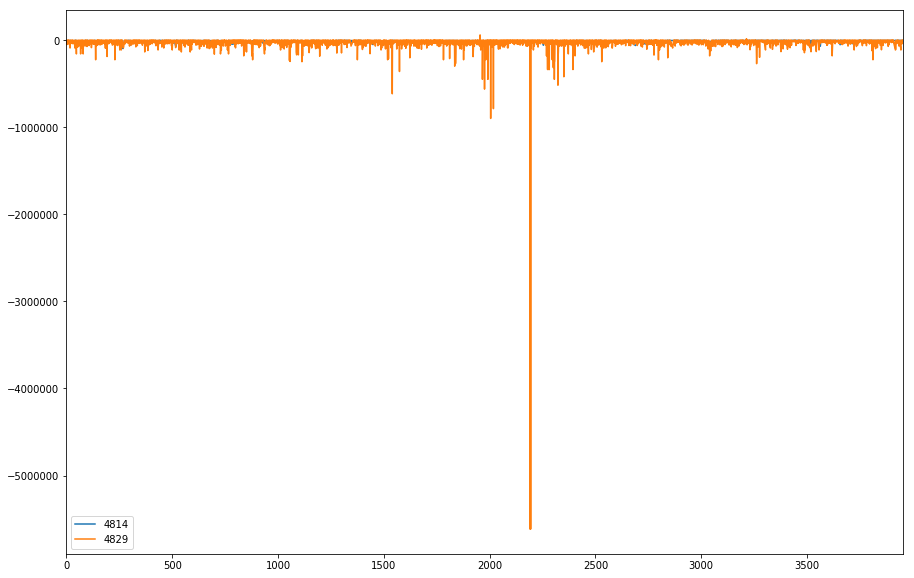

In [7]:
c4 = primaryClientAnalysis(pd.read_csv('70665012.csv'))

## Client 76510478

For this client and this mcc_code 4829 the summary is -456367086.91, amount of transactions is 4275


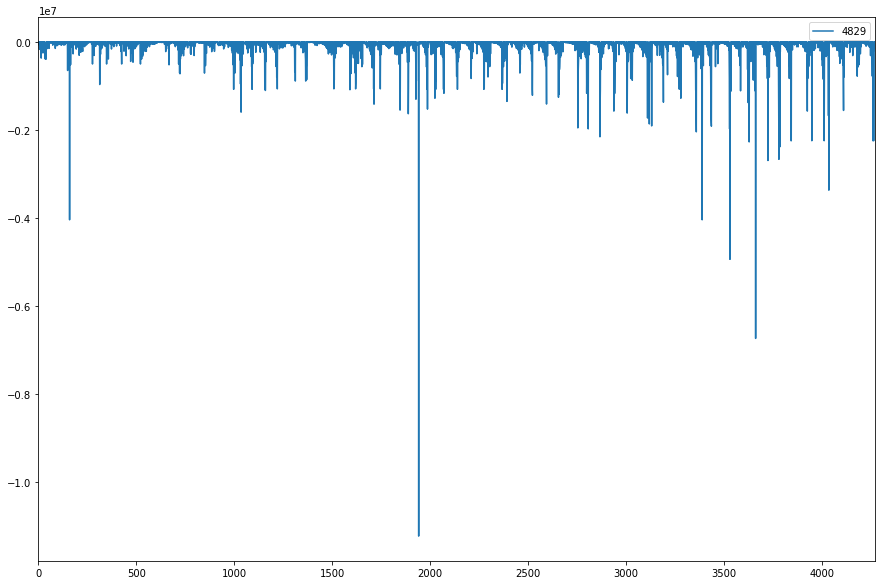

In [8]:
c5 = primaryClientAnalysis(pd.read_csv('76510478.csv'))

## Summary

Most occuring codes are 4829 and 4814.

# Functions for preprocess

In [9]:
def mcc_process(client, mcc_code):
    return client[mcc_code]

In [10]:
def count_pos_and_neg(client):
    pos = 0
    neg = 0
    for value in client['amount']:
        if value > 0:
            pos = pos + 1
        if value < 0: 
            neg = neg + 1
    print('There are %s positive values and %s negative values.' % (pos, neg))

In [12]:
def kick_negatives(client):
    return client[client['amount'] > 0]

def kick_positives(client):
    return client[client['amount'] < 0]

In [13]:
def drop_unused_cols(client):
    return client.drop(['customer_id', 'tr_datetime', 'mcc_code', 'tr_type', 'term_id'], 1)

In [22]:
def sum_by_days(client):
    result = {}
    days = pd.Series.unique(client['day'])
    for day in days:
        result[day] = sum(client[client['day'] == day]['amount'])
    return pd.DataFrame.from_dict(result, orient='index').rename(columns = {0 : 'amount'})

# MCC CODE 4829

Let's take a look at mcc_code=4829

In [14]:
c1_4829 = mcc_process(c1, 4829)
c2_4829 = mcc_process(c2, 4829)
c3_4829 = mcc_process(c3, 4829)
c4_4829 = mcc_process(c4, 4829)
c5_4829 = mcc_process(c5, 4829)

Let's count positive and negative transactions

In [17]:
count_pos_and_neg(c1_4829)
count_pos_and_neg(c2_4829)
count_pos_and_neg(c3_4829)
count_pos_and_neg(c4_4829)
count_pos_and_neg(c5_4829)

There are 0 positive values and 4254 negative values.
There are 0 positive values and 14231 negative values.
There are 0 positive values and 83 negative values.
There are 2 positive values and 3318 negative values.
There are 0 positive values and 4275 negative values.


So we will use only negative values and revert them to positives for distribution construction in future

In [18]:
c4_4829 = kick_positives(c4_4829)

Drop unused columns

In [20]:
c1_4829 = drop_unused_cols(c1_4829)
c2_4829 = drop_unused_cols(c2_4829)
c3_4829 = drop_unused_cols(c3_4829)
c4_4829 = drop_unused_cols(c4_4829)
c5_4829 = drop_unused_cols(c5_4829)

Sum values by days

In [23]:
daily_c1_4829 = sum_by_days(c1_4829)
daily_c2_4829 = sum_by_days(c2_4829)
daily_c3_4829 = sum_by_days(c3_4829)
daily_c4_4829 = sum_by_days(c4_4829)
daily_c5_4829 = sum_by_days(c5_4829)

Build histogram(with reverted amount to positive values)

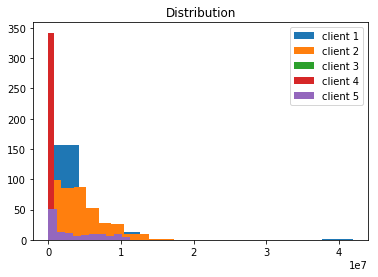

In [27]:
plt.hist(-daily_c1_4829['amount'])
plt.hist(-daily_c2_4829['amount'])
plt.hist(-daily_c3_4829['amount'])
plt.hist(-daily_c4_4829['amount'])
plt.hist(-daily_c5_4829['amount'])
plt.legend(['client 1','client 2','client 3','client 4','client 5'])
plt.title('Distribution')
plt.show()

## Daily exponential distribution

In [32]:
def get_lambda_neg(X):
    return 1.0 / -np.mean(X)

In [33]:
def count_lambda_probability_neg(x, lambda_value):
    return 1.0 - np.exp(lambda_value*x)

In [37]:
def naive_process_neg(X):
    X_size = len(X)
    result = []
    for i in X.index.values:
        if i > 0:
            sub_samples = X['amount'].head(i - 1)
            new_value = X['amount'][i]
            result.append(count_lambda_probability_neg(new_value, get_lambda_neg(sub_samples)))
    return result

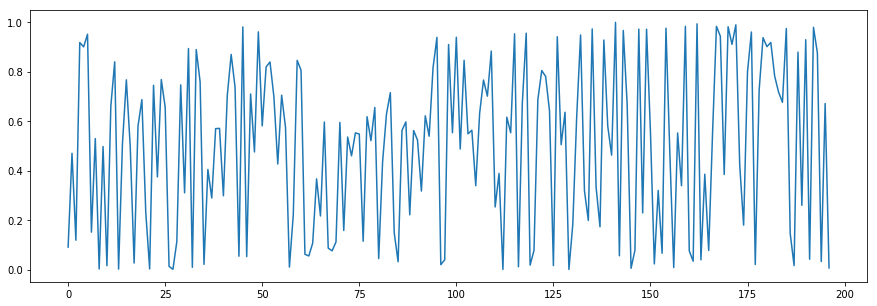

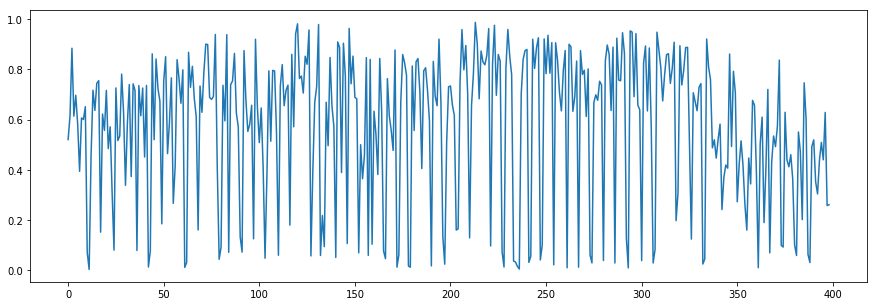

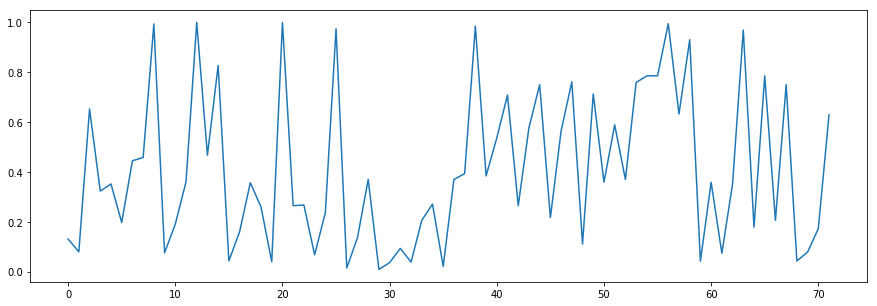

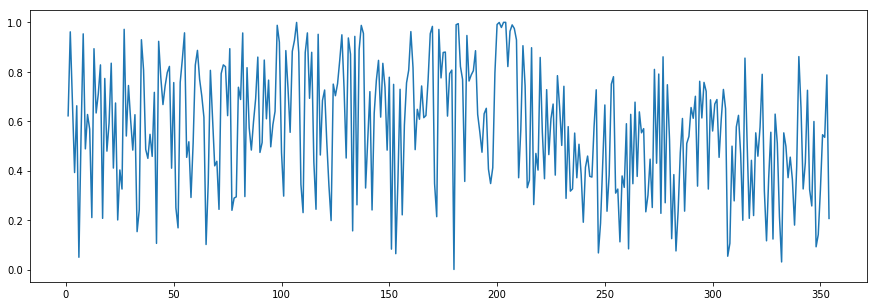

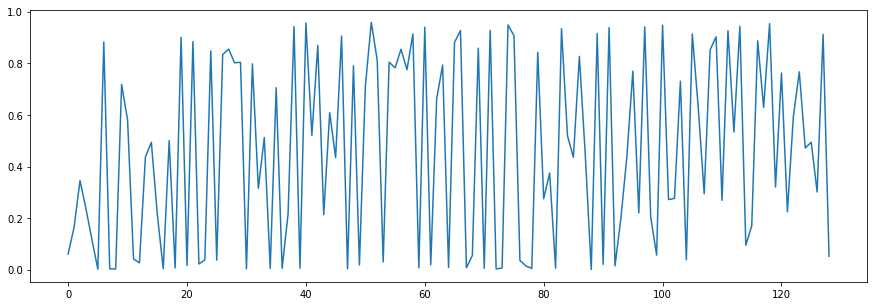

In [38]:
plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c1_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c2_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c3_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c4_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c5_4829))
plt.show()

## Weekly exponential distribution

In [39]:
def sum_by_weeks(client):
    result = {}
    days = client.index
    for week in range(1, int(len(days)/7)):
        result[week] = sum(client['amount'][week:week+7])
    return pd.DataFrame.from_dict(result, orient='index').rename(columns = {0 : 'amount'})

In [40]:
weekly_c1_4829 = sum_by_weeks(daily_c1_4829)
weekly_c2_4829 = sum_by_weeks(daily_c2_4829)
weekly_c3_4829 = sum_by_weeks(daily_c3_4829)
weekly_c4_4829 = sum_by_weeks(daily_c4_4829)
weekly_c5_4829 = sum_by_weeks(daily_c5_4829)

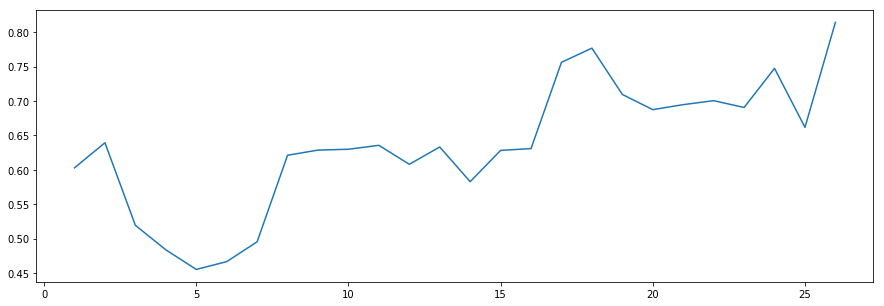

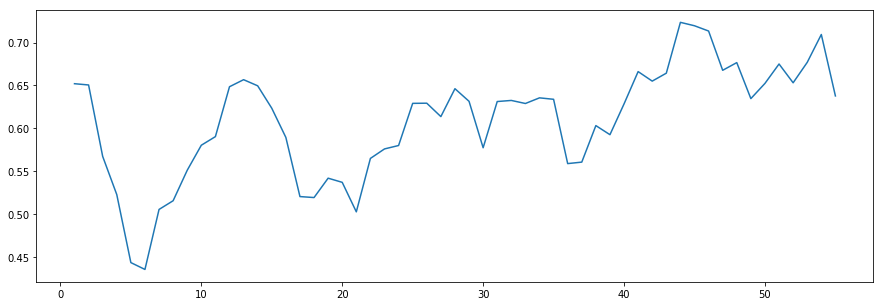

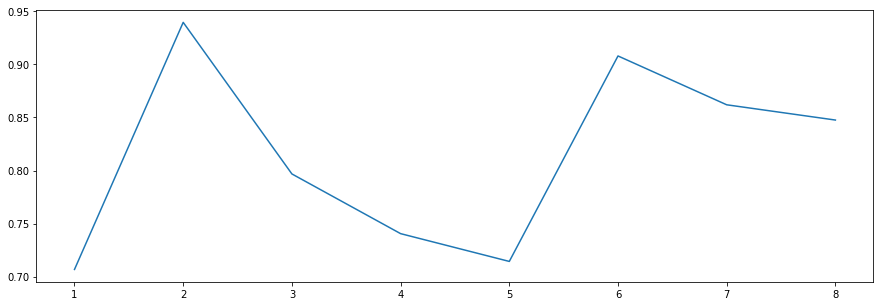

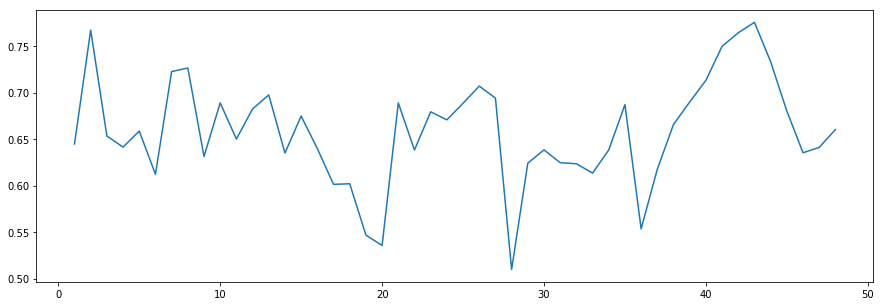

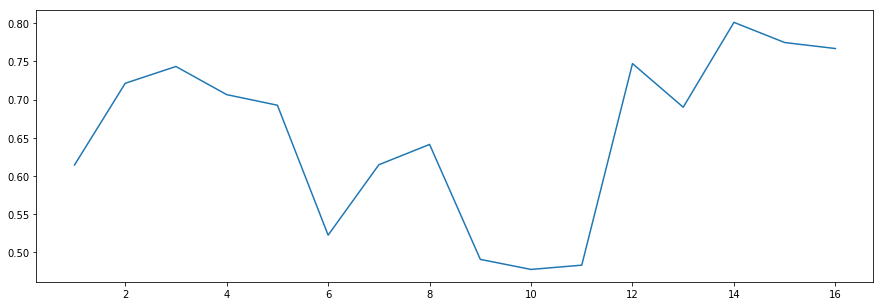

In [41]:
plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c1_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c2_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c3_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c4_4829))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c5_4829))
plt.show()

# MCC CODE 4814

Let's take a look at mcc_code=4829

In [48]:
c1_4814 = mcc_process(c1, 4814)
c2_4814 = mcc_process(c2, 4814)
c3_4814 = mcc_process(c3, 4814)
c4_4814 = mcc_process(c4, 4814)
c5_4814 = mcc_process(c5, 4814)

Let's count positive and negative transactions

In [49]:
count_pos_and_neg(c1_4814)
count_pos_and_neg(c2_4814)
count_pos_and_neg(c3_4814)
count_pos_and_neg(c4_4814)
count_pos_and_neg(c5_4814)

There are 0 positive values and 82 negative values.
There are 0 positive values and 465 negative values.
There are 0 positive values and 8617 negative values.
There are 0 positive values and 490 negative values.
There are 0 positive values and 1 negative values.


So we will use only negative values and revert them to positives for distribution construction in future

Drop unused columns

In [51]:
c1_4814 = drop_unused_cols(c1_4814)
c2_4814 = drop_unused_cols(c2_4814)
c3_4814 = drop_unused_cols(c3_4814)
c4_4814 = drop_unused_cols(c4_4814)
c5_4814 = drop_unused_cols(c5_4814)

Sum values by days

In [53]:
daily_c1_4814 = sum_by_days(c1_4814)
daily_c2_4814 = sum_by_days(c2_4814)
daily_c3_4814 = sum_by_days(c3_4814)
daily_c4_4814 = sum_by_days(c4_4814)
daily_c5_4814 = sum_by_days(c5_4814)

Build histogram(with reverted amount to positive values)

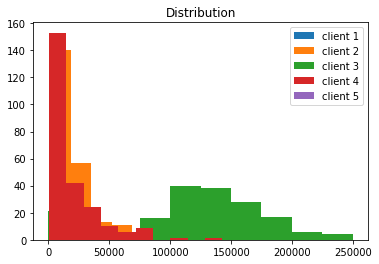

In [54]:
plt.hist(-daily_c1_4814['amount'])
plt.hist(-daily_c2_4814['amount'])
plt.hist(-daily_c3_4814['amount'])
plt.hist(-daily_c4_4814['amount'])
plt.hist(-daily_c5_4814['amount'])
plt.legend(['client 1','client 2','client 3','client 4','client 5'])
plt.title('Distribution')
plt.show()

## Daily exponential distribution

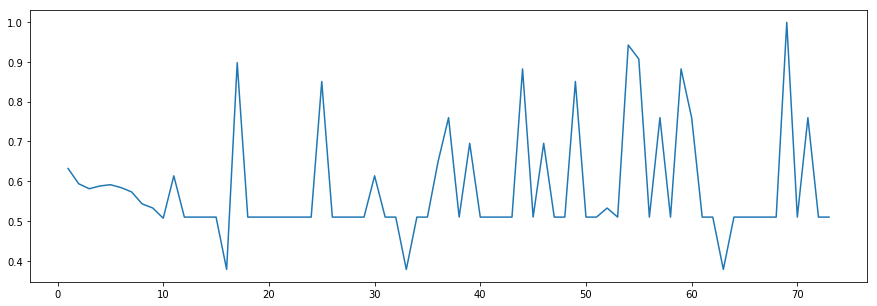

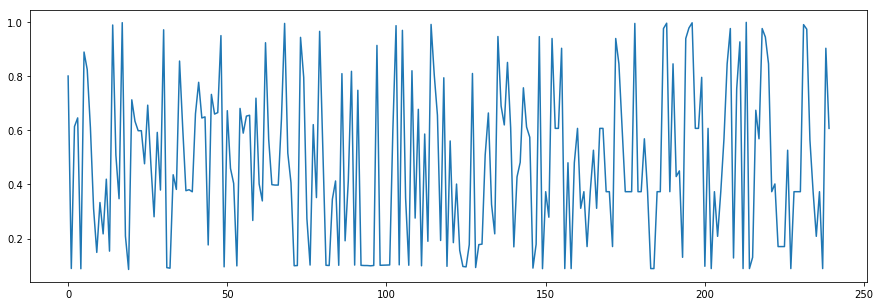

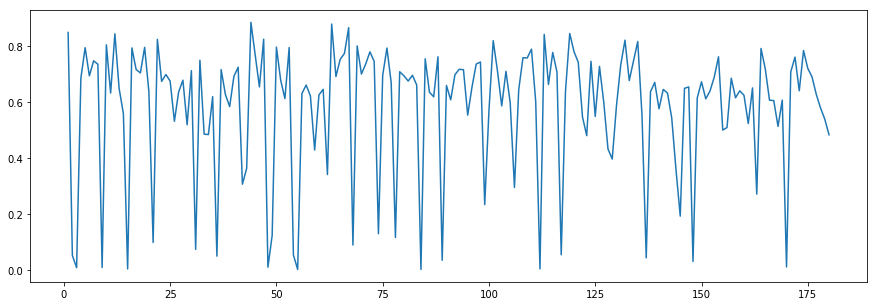

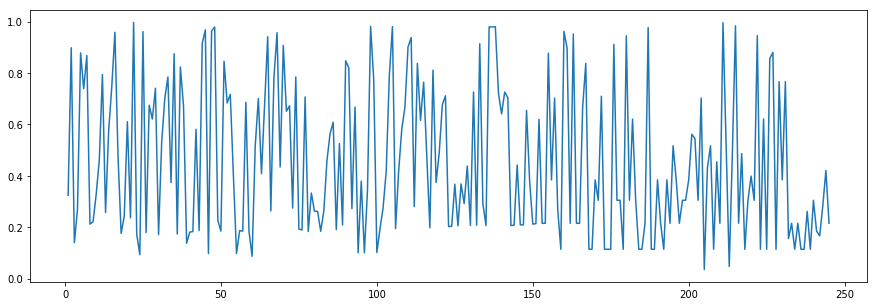

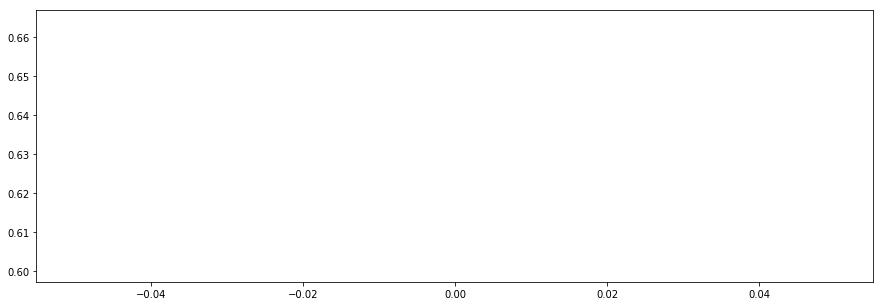

In [55]:
plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c1_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c2_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c3_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c4_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(daily_c5_4814))
plt.show()

## Weekly exponential distribution

In [56]:
weekly_c1_4814 = sum_by_weeks(daily_c1_4814)
weekly_c2_4814 = sum_by_weeks(daily_c2_4814)
weekly_c3_4814 = sum_by_weeks(daily_c3_4814)
weekly_c4_4814 = sum_by_weeks(daily_c4_4814)
weekly_c5_4814 = sum_by_weeks(daily_c5_4814)

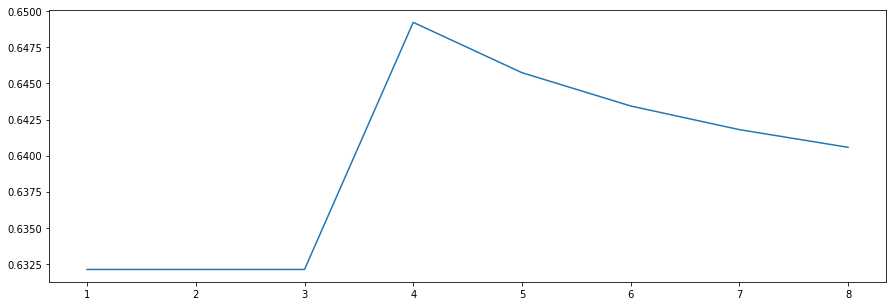

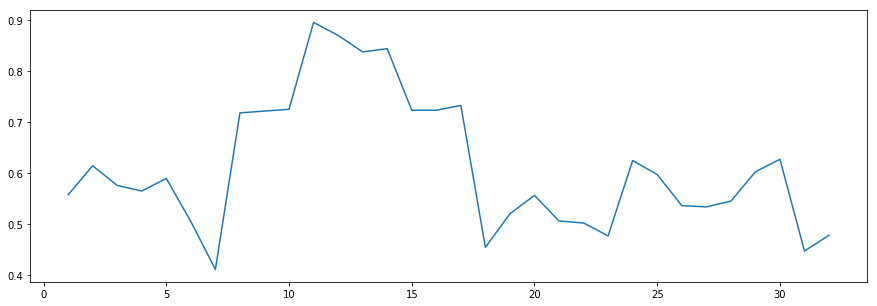

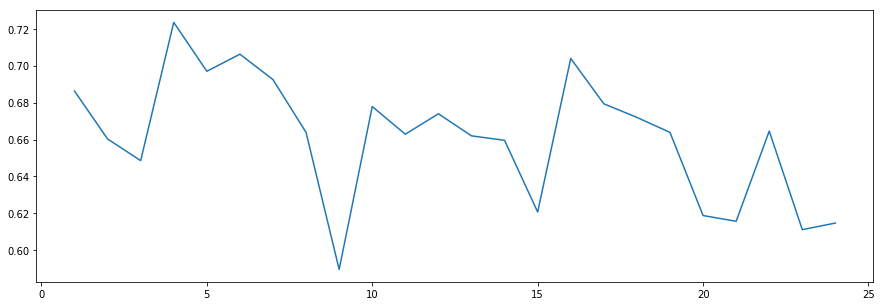

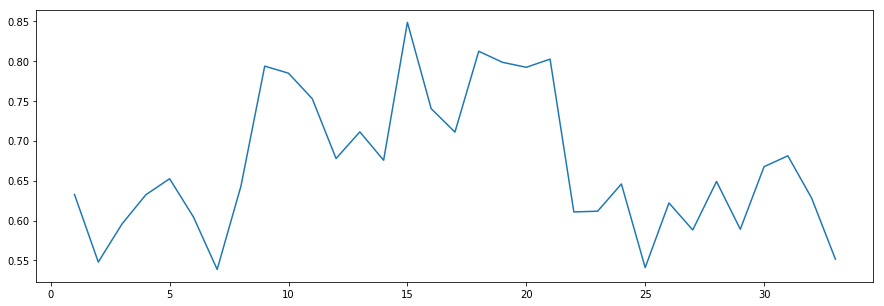

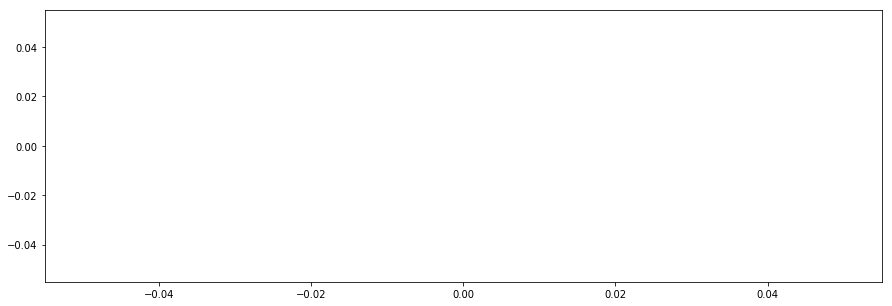

In [57]:
plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c1_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c2_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c3_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c4_4814))
plt.show()

plt.figure(figsize=(15,5))
plt.plot(naive_process_neg(weekly_c5_4814))
plt.show()